In [2]:
import json
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from collections import Counter
from datetime import timedelta, datetime
import glob
from itertools import chain
import json
import os
import re

## Magazine

In [4]:
mag = pd.read_json('magazine.json', lines=True)

In [5]:
mag.head(5)

,magazine_tag_list,id
0,"[브런치북, 육아일기, 대화법, 들려주고픈이야기]",38842
1,"[tea, food]",11540
2,[food],11541
3,"[브런치북, 일상, 시, 사람]",11546
4,"[감성에세이, 노래, 음악에세이]",11544


In [6]:
mag.shape

(27967, 2)

In [7]:
tag = mag.iloc[:,0]
tag_lst = []
for x in tag:
    for t in x:
        tag_lst.append(t)
        
print('Total tags:', len(tag_lst))
print('Unique tags:', len(set(tag_lst)))

Total tags: 79884
Unique tags: 18946


In [8]:
counts = Counter(tag_lst)
top20 = pd.DataFrame(counts.most_common(20))
print('top 20 tags:\n',top20)

top 20 tags:
        0     1
0   브런치북  2934
1    에세이  2875
2     일상  2079
3     여행  1884
4     영화  1263
5      책   882
6     생각   670
7     일기   661
8     사랑   612
9     독서   573
10    리뷰   570
11     시   512
12    사진   483
13  스타트업   473
14    소설   452
15  일러스트   441
16   글쓰기   432
17    육아   432
18    감성   370
19    음악   365


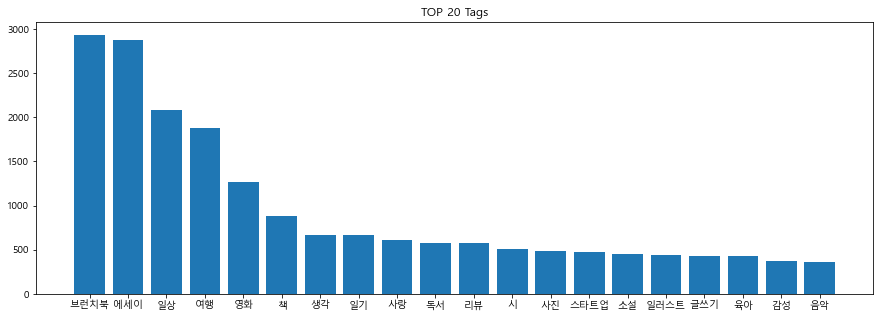

In [9]:
plt.figure(figsize=(15,5))
plt.bar(top20.iloc[:,0], top20.iloc[:,1])
plt.title('TOP 20 Tags')
plt.show()

## Metadata

In [10]:
meta = pd.read_json('metadata.json', lines=True)
meta.head(5)

,magazine_id,user_id,title,keyword_list,display_url,sub_title,reg_ts,article_id,id
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34


In [11]:
meta.shape

(643104, 9)

In [12]:
atc = meta.copy()
atc['reg_datetime'] = atc['reg_ts'].apply(lambda x : datetime.fromtimestamp(x/1000.0))
atc.loc[atc['reg_datetime'] == atc['reg_datetime'].min(), 'reg_datetime'] = datetime(2090, 12, 31)
atc['reg_dt'] = atc['reg_datetime'].dt.date
atc['type'] = atc['magazine_id'].apply(lambda x : '개인' if x == 0.0 else '매거진')
atc.columns = ['magazine_id', 'author_id', 'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts', 'id', 'article_id', 'reg_datetime', 'reg_dt', 'type']

atc.head(5)

,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,article_id,reg_datetime,reg_dt,type
0,8982,@bookdb,"사진으로 옮기기에도 아까운, 리치필드 국립공원","[여행, 호주, 국립공원]",https://brunch.co.kr/@bookdb/782,세상 어디에도 없는 호주 Top 10,1474944427000,782,@bookdb_782,2016-09-27 11:47:07,2016-09-27,매거진
1,12081,@kohwang56,[시] 서러운 봄,"[목련꽃, 아지랑이, 동행]",https://brunch.co.kr/@kohwang56/81,,1463092749000,81,@kohwang56_81,2016-05-13 07:39:09,2016-05-13,매거진
2,0,@hannahajink,무엇을 위해,[],https://brunch.co.kr/@hannahajink/4,무엇 때문에,1447997287000,4,@hannahajink_4,2015-11-20 14:28:07,2015-11-20,개인
3,16315,@bryceandjuli,싫다,"[감정, 마음, 위로]",https://brunch.co.kr/@bryceandjuli/88,,1491055161000,88,@bryceandjuli_88,2017-04-01 22:59:21,2017-04-01,매거진
4,29363,@mijeongpark,Dubliner#7,"[유럽여행, 더블린, 아일랜드]",https://brunch.co.kr/@mijeongpark/34,#7. 내 친구의 집은 어디인가,1523292942000,34,@mijeongpark_34,2018-04-10 01:55:42,2018-04-10,매거진


In [13]:
atc_cnt_by_reg_dt = atc.groupby('reg_dt', as_index=False)['article_id'].count()
atc_cnt_by_reg_dt[:-1]

,reg_dt,article_id
0,2015-05-06,1
1,2015-05-07,4
2,2015-05-08,7
3,2015-05-10,1
4,2015-05-11,7
...,...,...
1420,2019-03-27,803
1421,2019-03-28,804
1422,2019-03-29,806
1423,2019-03-30,563


Text(0, 0.5, '글 수')

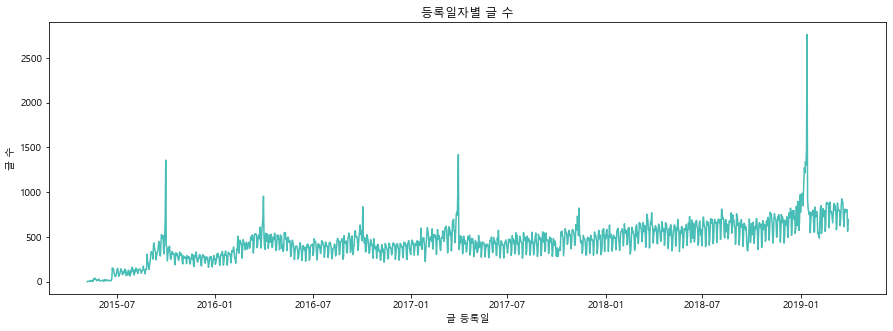

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(data=atc_cnt_by_reg_dt[:-1], x='reg_dt', y='article_id', color='#49beb7')
plt.title('등록일자별 글 수')
plt.xlabel('글 등록일')
plt.ylabel('글 수')

In [15]:
key = meta.loc[:,'keyword_list']
key_lst = []
for x in key:
    for k in x:
        key_lst.append(k)
        
print('All keywords: ', len(key_lst))
print('Unique keywords: ', len(set(key_lst)))

All keywords:  1651302
Unique keywords:  86037


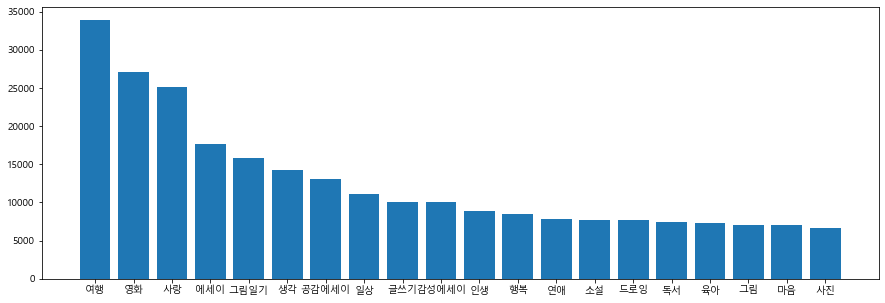

In [16]:
cnts = Counter(key_lst)
top20_key = pd.DataFrame(cnts.most_common(20))

plt.figure(figsize=(15,5))
plt.bar(top20_key.iloc[:,0], top20_key.iloc[:,1])
plt.show()

#### Magazine tag든 Article keyword든 여행, 영화, 사랑, 에세이, 일상 이런 느낌이 대세..

## Users

In [17]:
users = pd.read_json('C:/Users/secre/Desktop/GoGoogle/data/users.json', lines=True)
users.head(5)

,keyword_list,following_list,id
0,[],"[@perytail, @brunch]",#901985d8bc4c481805c4a4f911814c4a
1,[],"[@holidaymemories, @wadiz, @sciforus, @dailydu...",#1fd89e9dcfa64b45020d9eaca54e0eed
2,[],"[@commerceguy, @sunsutu, @kakao-it, @joohoonja...",#1d94baaea71a831e1f33e1c6bd126ed5
3,[],"[@amberjeon48, @forsy20, @nemotokki, @hawann, ...",#04641c01892b12dc018b1410e4928c0d
4,[],"[@dwcha7342, @iammento, @kakao-it, @dkam, @ant...",#65bcaff862aadff877e461f54187ab62


## Read.tar

In [18]:
read_file_lst = glob.glob('C:/Users/secre/Desktop/GoGoogle/data/read/read/*')
exclude_file_lst = ['read.tar']

In [19]:
read_df_lst = []
for f in read_file_lst:
    file_name = os.path.basename(f)
    if file_name in exclude_file_lst:
        print(file_name)
    else:
        df_temp = pd.read_csv(f, header=None, names=['raw'])
        df_temp['dt'] = file_name[:8]
        df_temp['hr'] = file_name[8:10]
        df_temp['user_id'] = df_temp['raw'].str.split(' ').str[0]
        df_temp['article_id'] = df_temp['raw'].str.split(' ').str[1:].str.join(' ').str.strip()
        read_df_lst.append(df_temp)

In [20]:
read = pd.concat(read_df_lst)
read.head(5)

,raw,dt,hr,user_id,article_id
0,#e208be4ffea19b1ceb5cea2e3c4dc32c @kty0613_91,20181001,00,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91
1,#0a3d493f3b2318be80f391eaa00bfd1c @miamiyoung_...,20181001,00,#0a3d493f3b2318be80f391eaa00bfd1c,@miamiyoung_31 @banksalad_49 @rlfrjsdn_95 @rea...
2,#b90d3ee7ed0d7d827aae168e159749f1 @joeunha_4 @...,20181001,00,#b90d3ee7ed0d7d827aae168e159749f1,@joeunha_4 @yoonvi_3
3,#b8b9d09fe2961fd62edc94912bf75a90 @hyejinchoi_...,20181001,00,#b8b9d09fe2961fd62edc94912bf75a90,@hyejinchoi_122 @hyejinchoi_86 @hyejinchoi_42 ...
4,#072f742eda9359cdac03ad080193c11d @doyeonsunim...,20181001,00,#072f742eda9359cdac03ad080193c11d,@doyeonsunim_240 @k52524_297 @bule13_33 @kwong...


In [21]:
def chainer(s):
    return list(chain.from_iterable(s.str.split(' ')))

In [22]:
read_cnt_by_user = read['article_id'].str.split(' ').map(len)
read_raw = pd.DataFrame({'dt': np.repeat(read['dt'], read_cnt_by_user),
                         'hr': np.repeat(read['hr'], read_cnt_by_user),
                         'user_id': np.repeat(read['user_id'], read_cnt_by_user),
                         'article_id': chainer(read['article_id'])})
read_raw.shape

(22110706, 4)

In [23]:
read_raw.head(5)

,dt,hr,user_id,article_id
0,20181001,00,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91
1,20181001,00,#0a3d493f3b2318be80f391eaa00bfd1c,@miamiyoung_31
1,20181001,00,#0a3d493f3b2318be80f391eaa00bfd1c,@banksalad_49
1,20181001,00,#0a3d493f3b2318be80f391eaa00bfd1c,@rlfrjsdn_95
1,20181001,00,#0a3d493f3b2318be80f391eaa00bfd1c,@readme999_140


In [24]:
print('Unique user: ', len(read_raw.user_id.unique()))
print('Unique article: ',len(read_raw.article_id.unique()))

Unique user:  306222
Unique article:  505841


### UserID 별 소비한 article 수

In [25]:
atc_read_user = read_raw[read_raw.article_id != ''].groupby(['user_id'])['article_id'].count()
atc_read_user = atc_read_user.reset_index()
atc_read_user.columns = ['user_id', 'cnt_per_user']
atc_read_user = atc_read_user.sort_values(by=['cnt_per_user'], axis=0)

In [26]:
top_user = atc_read_user.tail(20)

In [27]:
atc_read_user.describe()

,cnt_per_user
count,306050.000000
mean,72.229074
std,387.545304
min,1.000000
25%,3.000000
50%,11.000000
75%,39.000000
max,84840.000000


#### MAX 이 미친놈을 우찌할꼬..

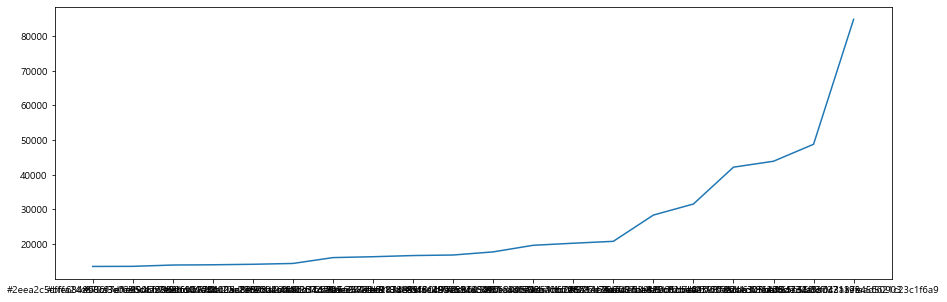

In [28]:
plt.figure(figsize=(15,5))
plt.plot(top_user.user_id, top_user.cnt_per_user)
plt.show()

#### 상위 유저 약 10명 정도가 좀 미친 소비량을 보임.. 조치가 필요할 듯

### 적은 수의 article 소비한 유저는 특정 주제만 소비하는지 확인

In [29]:
min_user = list(atc_read_user[atc_read_user.cnt_per_user == 5]['user_id'].values)
min_art = list(read_raw[(read_raw.user_id == min_user[0]) & (read_raw.article_id != '')]['article_id'].values)
min_key = atc[atc['article_id'].isin(min_art)]['keyword_list'].values
min_key = list(set(chain(*min_key)))
min_key

['소비', '에세이', '브런치', '사람', '글쓰기', '영화', '캐롤', '작가', '아몬드', '사랑']

In [30]:
med_user = list(atc_read_user[atc_read_user.cnt_per_user == 11]['user_id'].values)
med_art = list(read_raw[(read_raw.user_id == med_user[0]) & (read_raw.article_id != '')]['article_id'].values)
med_key = atc[atc['article_id'].isin(med_art)]['keyword_list'].values
med_key = list(set(chain(*med_key)))
med_key

['글쓰기', '남자', '스타일', '직장인', '글', '연인', '인간관계', '인사이트', '연애', '관계', '사랑', '여자']

In [31]:
mid_user = list(atc_read_user[atc_read_user.cnt_per_user == 30]['user_id'].values)
mid_art = list(read_raw[(read_raw.user_id == mid_user[0]) & (read_raw.article_id != '')]['article_id'].values)
mid_key = atc[atc['article_id'].isin(mid_art)]['keyword_list'].values
mid_key = list(set(chain(*mid_key)))
mid_key

['중국문화',
 '에세이',
 '스페인',
 '부동산경매',
 '액세서리',
 '태국',
 '청소',
 '남자친구',
 '헤어',
 '싱가포르',
 '회사생활',
 '연애',
 '상사',
 '투자',
 '농심',
 '인생',
 '우간다',
 '아메리카노',
 '나',
 '여행',
 '드라마',
 '남자',
 '직장인',
 '국제연애',
 '치약',
 '기념품',
 '기름때',
 '퇴사',
 '부록',
 '음식',
 '카카오',
 '과자',
 '스니커즈',
 '중국',
 '관광도시',
 '후드',
 '결혼',
 '권리분석',
 '사랑',
 '성장',
 '경단녀',
 '우유',
 '쇼핑',
 '주말등산',
 '중국어',
 '오리온',
 '아프리카',
 '웹툰',
 '재테크',
 '입냄새',
 '급식우유',
 '연금보험',
 '빵집',
 '선물',
 '휠라',
 '공감에세이',
 '쇼핑리스트',
 '샤넬',
 '결혼이야기',
 '출시',
 '명품',
 '베이커리',
 '양치',
 '경매',
 '엄마',
 '친정엄마',
 '우유급식',
 '생각',
 '크루아상',
 '로맨스',
 '베이커리카페']

#### 확실히 10내외의 소비를 한 유저의 경우 소비한 article의 keywords가 아까 말한 사랑, 에세이, 영화, 일상 이런게 많음 -> 저번 토의 내용처럼 이런 간헐적 유저들은 따로 빼서 인기글 위주 추천해줘도 괜찮을 것 같음

### Article 별 소비한 유저들의 수

In [32]:
atc_read_cnt = read_raw[read_raw.article_id != ''].groupby('article_id')['user_id'].count()
atc_read_cnt = atc_read_cnt.reset_index()
atc_read_cnt.tail()

,article_id,user_id
505835,@zzzaam_6,114
505836,@zzzaam_7,42
505837,@zzzaam_8,80
505838,@zzzaam_9,43
505839,@zzzwhite_4,2


In [33]:
atc_read_cnt.columns = ['article_id', 'read_cnt']
atc_read_cnt.tail()

,article_id,read_cnt
505835,@zzzaam_6,114
505836,@zzzaam_7,42
505837,@zzzaam_8,80
505838,@zzzaam_9,43
505839,@zzzwhite_4,2


In [34]:
atc_read_cnt.describe()

,read_cnt
count,505840.000000
mean,43.700988
std,302.292764
min,1.000000
25%,3.000000
50%,8.000000
75%,25.000000
max,97206.000000


In [35]:
atc_read_cnt.quantile([0.85, 0.95])

,read_cnt
0.85,47.0
0.95,141.0


#### 여기도 특정 Articles에 소비량이 매우 skewed 되어있는 듯

In [36]:
atc_read_cnt = pd.merge(atc_read_cnt, atc, how='left', left_on='article_id', right_on='article_id')
atc_read_cnt.tail()

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type
505835,@zzzaam_6,114,0.0,@zzzaam,좋은 제품 UX 디자인을 위한 9가지 방법,"[디자인, UX, design]",https://brunch.co.kr/@zzzaam/6,Hacking Product Design,1.489403e+12,6.0,2017-03-13 20:08:01,2017-03-13,개인
505836,@zzzaam_7,42,0.0,@zzzaam,반복적 디자인에 대한 소고,"[UX, 전략, 사용성]",https://brunch.co.kr/@zzzaam/7,Iteration is not design,1.490278e+12,7.0,2017-03-23 23:00:17,2017-03-23,개인
505837,@zzzaam_8,80,0.0,@zzzaam,인공지능과 미래의 디자인: 2025년의 디자이너,"[인공지능, AI, 디자인]",https://brunch.co.kr/@zzzaam/8,AI와 휴머니티의 간극,1.493136e+12,8.0,2017-04-26 00:57:34,2017-04-26,개인
505838,@zzzaam_9,43,0.0,@zzzaam,디자인팀에 작가가 필요한 이유,"[UX, 작가, 글쓰기]",https://brunch.co.kr/@zzzaam/9,Writers + Designers = A match made in he,1.496501e+12,9.0,2017-06-03 23:39:22,2017-06-03,개인
505839,@zzzwhite_4,2,0.0,@zzzwhite,너는 희망이다.,"[감성그림, 희망, 엄마]",https://brunch.co.kr/@zzzwhite/4,감성드로잉,1.467290e+12,4.0,2016-06-30 21:30:54,2016-06-30,개인


### 소비한 유저의 수를 AuthorID 기준으로 나눠보기

In [37]:
atc_read_aut = atc_read_cnt.groupby('author_id')['read_cnt'].sum()
atc_read_aut = atc_read_aut.reset_index()

In [38]:
atc_read_aut = atc_read_aut.sort_values(by=['read_cnt'], axis=0)
atc_read_aut.tail()

,author_id,read_cnt
1492,@binkond,156974
3223,@dailylife,256239
7929,@jordan777,311157
15026,@tenbody,319864
1844,@brunch,402451


#### TOP 10 Popular authors

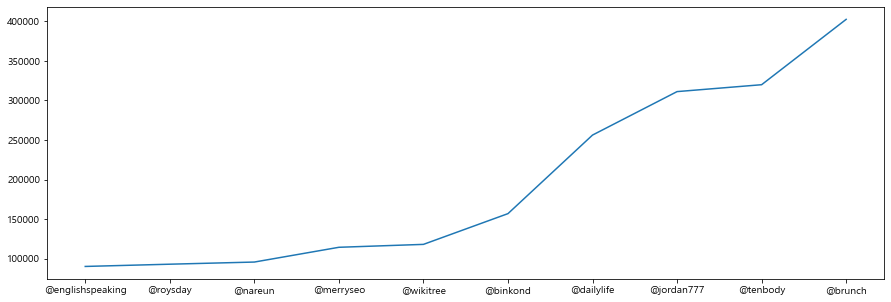

In [39]:
top = atc_read_aut.tail(10)

plt.figure(figsize=(15,5))
plt.plot(top.author_id, top.read_cnt)
plt.show()

#### TOP 20 Popular authors

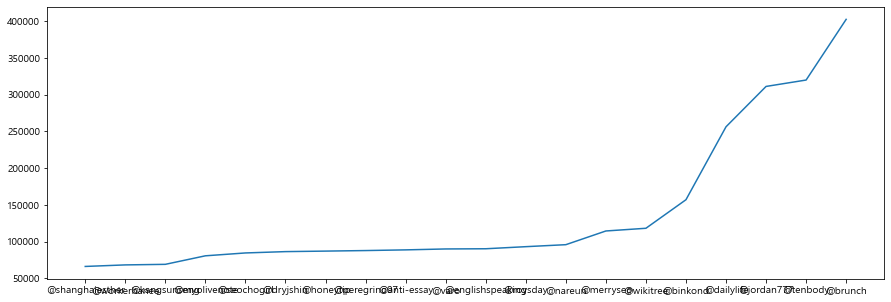

In [40]:
top2 = atc_read_aut.tail(20)

plt.figure(figsize=(15,5))
plt.plot(top2.author_id, top2.read_cnt)
plt.show()

#### 대충 한 TOP 10 작가들의 소비량이 매우 튐 -> 간헐적 유저들에게 인기글 추천 시 이 작가들+글의 keyword 적절히 조합해서 추천해줘도 될듯

## Users 데이터와 합쳐서 EDA

In [41]:
## Users와 통합
read_sub = read_raw.groupby('user_id')['article_id'].apply(list).reset_index()
read_sub.head()

,user_id,article_id
0,#00001ba6ca8d87d2fc34d626ba9cfe6f,"[@kecologist_68, @brunch_1, @swimmingstar_289]"
1,#0000d1188f75d0b0ea7a8e23a2b760e5,[@hyunilikes_156]
2,#0000e87158c1426d6ffb72cebac6cb64,"[@brunch_133, @boosw1999_18]"
3,#0000eea6d339abfd02ed590bc451fc63,[@sucopy_182]
4,#0000fdba8f35c76eacab74c5c6bc7f1a,"[@lazypic_30, @lazypic_30, @tenbody_1305, @stu..."


In [42]:
read_users = pd.merge(read_sub, users, how='left', left_on='user_id', right_on='id')
read_users = read_users.drop('id',axis=1)

In [43]:
read_users.tail()

,user_id,article_id,keyword_list,following_list
306217,#ffff4182b6ddc94e91ce4af8e0143cc1,[@mayasangmi_1],[],[@brunch]
306218,#ffff69451ff594425637015500410a13,"[@yaya35_20, @kangsunseng_754, @simplelife-1p_...",[],[@brunch]
306219,#ffff8d99b9caef8ad1b95cecf0b8eef4,"[@yoonballet_181, @yoonballet_183, @binkond_11...",[],[@brunch]
306220,#ffffa52a4e6b0387bc362b18b867b3fc,"[@yeoneo_125, @edityou_122, @snobberys_109, @t...",[],[@brunch]
306221,#ffffc97f29a10678203330ec0b6bf138,"[@honeytip_940, @sangheeshyn_83]",[],[@brunch]


#### kakao EDA에 따르면 전체 소비 데이터 중 구독하고 있는 작가의 글 소비 비중 35%뿐..ㅜ

In [44]:
# 소비수 기준 분류값
def get_class(x):
    if x >= 142:
        result = '5%'
    elif x >= 72:
        result = '10%'
    elif x >= 25:
        result = '25%'
    elif x >= 8:
        result = '50%'
    elif x >= 3:
        result = '75%'
    else:
        result = '100%'
    return result

In [45]:
atc_read_cnt_nn = atc_read_cnt[atc_read_cnt['id'].notnull()]
atc_read_cnt_nn['class'] = atc_read_cnt_nn['read_cnt'].map(get_class)
atc_read_cnt_nn.head()

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type,class
5417,@002_10,2,0.0,@002,'80% 안심계란' 포기하게 한 20% 살충제 계란,"[계란, 살충제, 피해]",https://brunch.co.kr/@002/10,정직한 농가에 대한 피해보상은 소비자 신뢰를 돌려주는 것,1.504448e+12,10.0,2017-09-03 23:12:35,2017-09-03,개인,100%
5418,@002_2,6,0.0,@002,청년들은 '왜' 농촌으로 갔을까?,"[귀촌, 농촌, 청년농업인]",https://brunch.co.kr/@002/2,삶의 가치를 찾아 유랑하는 청년들의 'YOLO 라이프',1.501030e+12,2.0,2017-07-26 09:46:45,2017-07-26,개인,75%
5419,@002jesus_1,10,0.0,@002jesus,우리는 왜 가난해야 하나요?,"[후원, 기부, 비영리]",https://brunch.co.kr/@002jesus/1,비영리를 바라보는 편견들 (1),1.549456e+12,1.0,2019-02-06 21:18:49,2019-02-06,개인,50%
5420,@002paper_2,3,0.0,@002paper,할수 있는 것과 하고 싶은 것,"[제주, 서울생활, 서울]",https://brunch.co.kr/@002paper/2,현실과 꿈의 거리..,1.470905e+12,2.0,2016-08-11 17:49:42,2016-08-11,개인,75%
5421,@002paper_3,2,0.0,@002paper,긍정적으로 생각하며 주문을 걸기..,"[바램, 일상에세이, 긍정]",https://brunch.co.kr/@002paper/3,된다. 된다. 될거다....,1.470913e+12,3.0,2016-08-11 19:58:52,2016-08-11,개인,100%


Text(0, 0.5, '글 소비수')

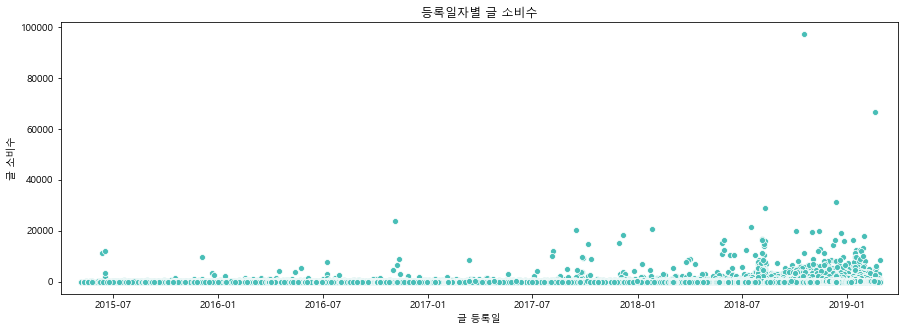

In [46]:
plt.figure(figsize=(15,5))
lm = sns.scatterplot(data=atc_read_cnt_nn, x='reg_dt', y='read_cnt', color='#49beb7')
lm.set(xlim=(datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2019, 3, 30))))
plt.title('등록일자별 글 소비수')
plt.xlabel('글 등록일')
plt.ylabel('글 소비수')

In [47]:
atc_read_cnt_nn.sort_values(by='read_cnt', ascending=False).head(2)

,article_id,read_cnt,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type,class
63061,@brunch_141,97206,0.0,@brunch,브런치 작가가 함께 빨강머리 앤을 그리고 쓰다.,"[브런치X빨강머리앤, 빨강머리앤, 출판, 작가]",https://brunch.co.kr/@brunch/141,글·그림 작가 파트너 프로젝트,1.539742e+12,141.0,2018-10-17 11:11:22,2018-10-17,개인,5%
63070,@brunch_151,66903,0.0,@brunch,"브런치 무비 패스, 영화의 진한 여운을 나누세요","[브런치, 시사회, 브런치무비패스]",https://brunch.co.kr/@brunch/151,브런치 무비 패스 5기 작가 모집,1.550466e+12,151.0,2019-02-18 14:00:34,2019-02-18,개인,5%


Text(0, 0.5, '글 소비수')

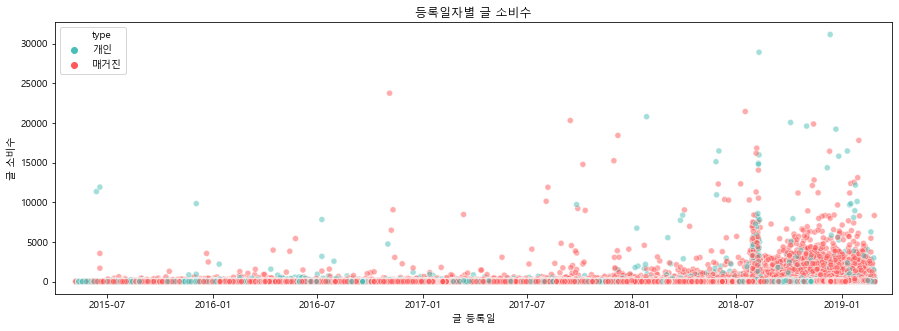

In [48]:
# 특이값 2개 데이터를 제외
plt.figure(figsize=(15,5))
lm = sns.scatterplot(data=atc_read_cnt_nn[~atc_read_cnt_nn.article_id.isin(['@brunch_141', '@brunch_151'])], x='reg_dt', y='read_cnt', hue='type', alpha=0.5, palette=['#49beb7', '#ff5959'])
lm.set(xlim=(datetime.date(datetime(2015, 4, 1)), datetime.date(datetime(2019, 3, 30))))
plt.title('등록일자별 글 소비수')
plt.xlabel('글 등록일')
plt.ylabel('글 소비수')

In [49]:
off_data = pd.merge(read_raw, atc, how='inner', left_on='article_id', right_on='article_id')
off_data.head(5)

,dt,hr,user_id,article_id,magazine_id,author_id,title,keyword_list,display_url,sub_title,reg_ts,id,reg_datetime,reg_dt,type
0,20181001,00,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91,38720,@kty0613,좋은 이성을 만나는 기준,"[연애, 남자친구, 이성]",https://brunch.co.kr/@kty0613/91,문제는 만남의 '기회'가 아닌 만남의 '기준',1538321174000,91,2018-10-01 00:26:14,2018-10-01,매거진
1,20181001,00,#e6097910257c8b79380da50b4bce705b,@kty0613_91,38720,@kty0613,좋은 이성을 만나는 기준,"[연애, 남자친구, 이성]",https://brunch.co.kr/@kty0613/91,문제는 만남의 '기회'가 아닌 만남의 '기준',1538321174000,91,2018-10-01 00:26:14,2018-10-01,매거진
2,20181001,00,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,38720,@kty0613,좋은 이성을 만나는 기준,"[연애, 남자친구, 이성]",https://brunch.co.kr/@kty0613/91,문제는 만남의 '기회'가 아닌 만남의 '기준',1538321174000,91,2018-10-01 00:26:14,2018-10-01,매거진
3,20181001,00,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,38720,@kty0613,좋은 이성을 만나는 기준,"[연애, 남자친구, 이성]",https://brunch.co.kr/@kty0613/91,문제는 만남의 '기회'가 아닌 만남의 '기준',1538321174000,91,2018-10-01 00:26:14,2018-10-01,매거진
4,20181001,00,#bd4b6d5a32bcbe4a81419309af898630,@kty0613_91,38720,@kty0613,좋은 이성을 만나는 기준,"[연애, 남자친구, 이성]",https://brunch.co.kr/@kty0613/91,문제는 만남의 '기회'가 아닌 만남의 '기준',1538321174000,91,2018-10-01 00:26:14,2018-10-01,매거진


In [50]:
off_data.columns = ['read_dt', 'hr', 'user_id', 'article_id', 'magazine_id', 'author_id',
                    'title', 'keyword_list', 'display_url', 'sub_title', 'reg_ts',
                    'article_seq', 'reg_datetime', 'reg_dt', 'type']
off_data = off_data[['read_dt', 'user_id', 'article_id', 'title', 'sub_title', 'author_id', 'reg_dt', 'type', 'display_url', 'keyword_list', 'magazine_id']]
off_data.head(5)

,read_dt,user_id,article_id,title,sub_title,author_id,reg_dt,type,display_url,keyword_list,magazine_id
0,20181001,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720
1,20181001,#e6097910257c8b79380da50b4bce705b,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720
2,20181001,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720
3,20181001,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720
4,20181001,#bd4b6d5a32bcbe4a81419309af898630,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720


In [51]:
off_data['read_dt'] = pd.to_datetime(off_data['read_dt'], format='%Y%m%d')
off_data['reg_dt'] = pd.to_datetime(off_data['reg_dt'], format='%Y-%m-%d')
off_data['off_day'] = (off_data['read_dt'] - off_data['reg_dt']).dt.days
off_data = pd.merge(off_data, atc_read_cnt_nn[['article_id', 'read_cnt', 'class']], how='left', left_on='article_id', right_on='article_id')
off_data.head()

,read_dt,user_id,article_id,title,sub_title,author_id,reg_dt,type,display_url,keyword_list,magazine_id,off_day,read_cnt,class
0,2018-10-01,#e208be4ffea19b1ceb5cea2e3c4dc32c,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720,0,298,5%
1,2018-10-01,#e6097910257c8b79380da50b4bce705b,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720,0,298,5%
2,2018-10-01,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720,0,298,5%
3,2018-10-01,#abfa7b43a9c3f4894ca450b0436fcd38,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720,0,298,5%
4,2018-10-01,#bd4b6d5a32bcbe4a81419309af898630,@kty0613_91,좋은 이성을 만나는 기준,문제는 만남의 '기회'가 아닌 만남의 '기준',@kty0613,2018-10-01,매거진,https://brunch.co.kr/@kty0613/91,"[연애, 남자친구, 이성]",38720,0,298,5%


In [52]:
off_data_agg = off_data.groupby(['article_id', 'off_day', 'read_dt', 'reg_dt', 'title', 'author_id', 'type', 'display_url', 'magazine_id', 'class'], as_index=False)['user_id'].count()

# 등록일자가 missing된 로그들
off_data_agg[off_data_agg.off_day < 0].head()

,article_id,off_day,read_dt,reg_dt,title,author_id,type,display_url,magazine_id,class,user_id
166,@01023920600_18,-26324,2018-12-05,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,2
167,@01023920600_18,-26303,2018-12-26,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,2
168,@01023920600_18,-26280,2019-01-18,2090-12-31,김영화가,@01023920600,매거진,https://brunch.co.kr/@01023920600/18,8123,75%,1
172,@01023920600_2,-26324,2018-12-05,2090-12-31,효자되는 소액투자 돈불리는 소액투자,@01023920600,개인,https://brunch.co.kr/@01023920600/2,0,75%,2
173,@01023920600_2,-26303,2018-12-26,2090-12-31,효자되는 소액투자 돈불리는 소액투자,@01023920600,개인,https://brunch.co.kr/@01023920600/2,0,75%,2


In [53]:
# 경과일자별 소비수 총합
off_day_sum = off_data_agg[(off_data_agg['reg_dt'] >= datetime(2018, 10, 1)) & (off_data_agg.off_day >= 0)].groupby('off_day')['user_id'].sum()

# 경과일자에 등록되어있는 아티클 수
reg_dt_cnt = off_data_agg[(off_data_agg['reg_dt'] >= datetime(2018, 10, 1)) & (off_data_agg.off_day >= 0)].groupby('reg_dt')['article_id'].nunique()

In [54]:
off_day_avg = pd.concat([off_day_sum, reg_dt_cnt.cumsum().sort_index(ascending=False).reset_index()], axis=1)
off_day_avg['off_avg'] = off_day_avg['user_id'] / off_day_avg['article_id']
off_day_avg['percentile'] = off_day_avg['off_avg'] / off_day_avg['off_avg'].sum()
off_day_avg['cum_per'] = off_day_avg['percentile'].cumsum()
off_day_avg.head(10)

,user_id,reg_dt,article_id,off_avg,percentile,cum_per
0,3142049,2019-02-28,107356,29.267568,0.207084,0.207084
1,1726882,2019-02-27,106649,16.192201,0.114569,0.321653
2,1017862,2019-02-26,105891,9.612356,0.068013,0.389665
3,776093,2019-02-25,105156,7.380397,0.052220,0.441886
4,632960,2019-02-24,104308,6.068183,0.042936,0.484821
5,529081,2019-02-23,103611,5.106417,0.036131,0.520952
6,436611,2019-02-22,103019,4.238160,0.029987,0.550939
7,412530,2019-02-21,102167,4.037801,0.028570,0.579509
8,236772,2019-02-20,101343,2.336343,0.016531,0.596040
9,193039,2019-02-19,100511,1.920576,0.013589,0.609629


Text(0, 0.5, '평균 글 소비수')

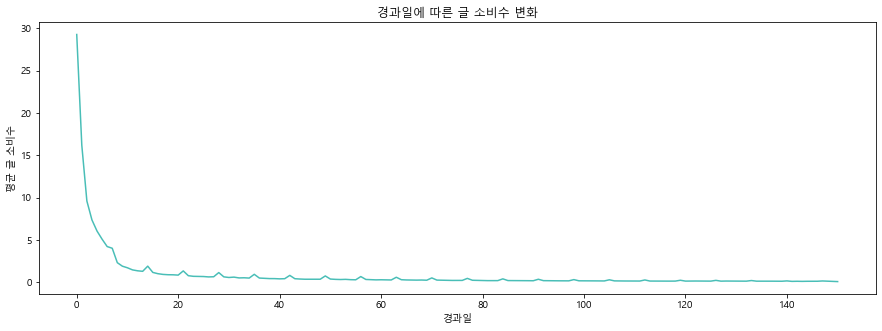

In [55]:
plt.figure(figsize=(15,5))
sns.lineplot(data=off_day_avg, x=off_day_avg.index, y='off_avg', color='#49beb7')
plt.title('경과일에 따른 글 소비수 변화')
plt.xlabel('경과일')
plt.ylabel('평균 글 소비수')

#### 경과일 10일 정도 이내에 글을 소비한 사람이 찐독자일까?

### 기타 통계들

In [56]:
# 유져별 방문일수, 글 소비수
grp_by_user = off_data.groupby('user_id').agg({'read_dt':['nunique', 'count']})

In [57]:
grp_by_user = grp_by_user.reset_index()
grp_by_user.columns = ['user_id', 'visit_day_cnt', 'read_cnt']
grp_by_user.head()

,user_id,visit_day_cnt,read_cnt
0,#00001ba6ca8d87d2fc34d626ba9cfe6f,1,3
1,#0000e87158c1426d6ffb72cebac6cb64,1,2
2,#0000eea6d339abfd02ed590bc451fc63,1,1
3,#0000fdba8f35c76eacab74c5c6bc7f1a,3,11
4,#000127ad0f1981cae1292efdb228f0e9,1,27


In [58]:
grp_by_user['visit_day_cnt'].value_counts(normalize=True).head()

1    0.352137
2    0.142516
3    0.088841
4    0.063050
5    0.047217
Name: visit_day_cnt, dtype: float64

In [59]:
grp_by_user['visit_day_cnt'].value_counts(normalize=True).sort_index()[74:].sum()

0.009034902176890052

#### 1~2회 방문 유저는 전체 유저의 50% / 75회 이상 방문자는 전체의 약 1%

In [60]:
low_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] <=2, 'user_id']
upp_visit_user = grp_by_user.loc[grp_by_user['visit_day_cnt'] >=75, 'user_id']
low_visit_user.shape, upp_visit_user.shape

((149903,), (2738,))

In [61]:
off_data_l = off_data[off_data.user_id.isin(low_visit_user)]
off_data_u = off_data[off_data.user_id.isin(upp_visit_user)]
off_data.shape, off_data_l.shape, off_data_u.shape

((20905040, 14), (1083925, 14), (5002114, 14))

In [62]:
off_data_l = off_data[off_data.user_id.isin(low_visit_user)]
off_data_u = off_data[off_data.user_id.isin(upp_visit_user)]
off_data.shape, off_data_l.shape, off_data_u.shape

((20905040, 14), (1083925, 14), (5002114, 14))

In [63]:
1083925/20905040, 5002114/20905040

(0.051849936665990595, 0.23927789662205862)

#### 신규 유저의 글 소비는 전체의 5% / 단골 유저의 글 소비는 전체의 24%

In [64]:
off_data_l_rk = off_data_l.groupby(['article_id', 'title', 'reg_dt'])['user_id'].count().sort_values(ascending=False)
off_data_l_rk = off_data_l_rk.reset_index()
off_data_l_rk['rk'] = off_data_l_rk.index + 1
off_data_u_rk = off_data_u.groupby(['article_id', 'title', 'reg_dt'])['user_id'].count().sort_values(ascending=False)
off_data_u_rk = off_data_u_rk.reset_index()
off_data_u_rk['rk'] = off_data_u_rk.index + 1

# 신규 독자 소비수 상위 상위 10개 글
off_data_l_rk.head(10)

,article_id,title,reg_dt,user_id,rk
0,@brunch_141,브런치 작가가 함께 빨강머리 앤을 그리고 쓰다.,2018-10-17,13519,1
1,@brunch_151,"브런치 무비 패스, 영화의 진한 여운을 나누세요",2019-02-18,8160,2
2,@brunch_1,"글이 작품이 되는 공간, 브런치",2015-06-12,5282,3
3,@brunch_140,카카오 크리에이터스 스튜디오에서 브런치 작가를 만나다.,2018-10-04,4343,4
4,@brunch_2,브런치 작가 신청 안내,2015-06-18,4068,5
5,@brunch_145,"10인의 에디터와 함께 하는, 브런치북 프로젝트 #6",2018-12-12,2897,6
6,@brunch_133,"또 다른 기회의 시작, 브런치와 함께하세요",2018-07-09,2640,7
7,@kakaomobility_20,음성으로 편리하게,2018-10-17,2458,8
8,@intlovesong_28,아끼면 똥 되는 것 4가지,2016-11-04,2226,9
9,@brunch_142,[예고] 브런치북 프로젝트 #6,2018-11-01,2221,10


In [65]:
# 단골 독자 소비수 상위 상위 10개 글
off_data_u_rk.head(10)

,article_id,title,reg_dt,user_id,rk
0,@brunch_141,브런치 작가가 함께 빨강머리 앤을 그리고 쓰다.,2018-10-17,11636,1
1,@brunch_151,"브런치 무비 패스, 영화의 진한 여운을 나누세요",2019-02-18,6010,2
2,@brunch_145,"10인의 에디터와 함께 하는, 브런치북 프로젝트 #6",2018-12-12,4379,3
3,@tenbody_1305,러닝머신보다 효과 좋은 체지방 빼는 맨몸 운동 5가지,2018-08-10,3674,4
4,@hyehyodam_19,나쁜년이 잘 사는 이유...,2018-01-26,2920,5
5,@sangheeshyn_66,살찌지 않는 여자들,2018-11-13,2866,6
6,@brunch_142,[예고] 브런치북 프로젝트 #6,2018-11-01,2753,7
7,@intlovesong_28,아끼면 똥 되는 것 4가지,2016-11-04,2606,8
8,@x-xv_19,"승무원, 들어오려는 자, 나가려는 자",2018-08-05,2603,9
9,@steven_179,친구 없는 사람의 3가지 특징,2017-09-15,2597,10


In [66]:
off_data_lu_rk = pd.merge(off_data_l_rk, off_data_u_rk, how='outer', left_on = 'article_id', right_on='article_id')
off_data_lu_rk['diff_rk'] = off_data_lu_rk['rk_x'] - off_data_lu_rk['rk_y']

# 신규 독자 소비수 상위 50개 글 중 단골 독자의 순위 차가 많이 나는 글
off_data_lu_rk[off_data_lu_rk.rk_x <= 50].sort_values(by='diff_rk', ascending=True).head(10)

,article_id,title_x,reg_dt_x,user_id_x,rk_x,title_y,reg_dt_y,user_id_y,rk_y,diff_rk
7,@kakaomobility_20,음성으로 편리하게,2018-10-17,2458.0,8.0,음성으로 편리하게,2018-10-17,14.0,64179.0,-64171.0
4,@brunch_2,브런치 작가 신청 안내,2015-06-18,4068.0,5.0,브런치 작가 신청 안내,2015-06-18,232.0,3216.0,-3211.0
33,@brunch_139,작가님에게 새로운 제안이 도착했습니다,2018-08-08,1047.0,34.0,작가님에게 새로운 제안이 도착했습니다,2018-08-08,474.0,750.0,-716.0
18,@brunch_152,작가 인터뷰 - 임희정 아나운서의 고백,2019-02-27,1611.0,19.0,작가 인터뷰 - 임희정 아나운서의 고백,2019-02-27,480.0,730.0,-711.0
2,@brunch_1,"글이 작품이 되는 공간, 브런치",2015-06-12,5282.0,3.0,"글이 작품이 되는 공간, 브런치",2015-06-12,528.0,569.0,-566.0
26,@brunch_111,브런치 책방에 작가님의 책을 입고해주세요,2017-09-28,1326.0,27.0,브런치 책방에 작가님의 책을 입고해주세요,2017-09-28,702.0,315.0,-288.0
35,@jmg5308_163,이효리를 통해 바라본 자존감 높은 사람의 특징,2017-08-04,995.0,36.0,이효리를 통해 바라본 자존감 높은 사람의 특징,2017-08-04,795.0,233.0,-197.0
38,@dong02_1372,자존감을 높이는 언어습관 3가지 방법,2017-10-11,876.0,39.0,자존감을 높이는 언어습관 3가지 방법,2017-10-11,880.0,185.0,-146.0
31,@nplusu_49,벨기에의 3가지 보물,2016-11-10,1170.0,32.0,벨기에의 3가지 보물,2016-11-10,900.0,175.0,-143.0
45,@needleworm_1,크롤러를 이용해 우체국 등기우편을 자동으로 정리해 보자,2018-11-01,796.0,46.0,크롤러를 이용해 우체국 등기우편을 자동으로 정리해 보자,2018-11-01,905.0,173.0,-127.0


In [67]:
# 단골 독자 소비수 상위 50개 글 중 신규 독자의 순위 차가 많이 나는 긂
off_data_lu_rk[off_data_lu_rk.rk_y <= 50].sort_values(by='diff_rk', ascending=False).head(10)

,article_id,title_x,reg_dt_x,user_id_x,rk_x,title_y,reg_dt_y,user_id_y,rk_y,diff_rk
753,@doyeonsunim_240,자기 관리의 시작,2018-08-06,117.0,754.0,자기 관리의 시작,2018-08-06,1608.0,37.0,717.0
504,@boboc_72,"여름, 수박을 먹는 계절",2018-08-12,151.0,505.0,"여름, 수박을 먹는 계절",2018-08-12,1473.0,49.0,456.0
434,@kam_33,많이 먹은 다음날 반드시 지켜야 할 3가지 습관,2018-08-09,167.0,435.0,많이 먹은 다음날 반드시 지켜야 할 3가지 습관,2018-08-09,1751.0,29.0,406.0
261,@jooyoon_51,구질구질한 연애,2018-08-01,227.0,262.0,구질구질한 연애,2018-08-01,1750.0,30.0,232.0
211,@greenut90_85,크림라떼와 브라우니,2018-08-05,257.0,212.0,크림라떼와 브라우니,2018-08-05,1573.0,41.0,171.0
199,@roysday_279,혼자서 어찌어찌 하다보니 1억을 넘겼다.,2018-11-03,266.0,200.0,혼자서 어찌어찌 하다보니 1억을 넘겼다.,2018-11-03,1659.0,36.0,164.0
162,@honeytip_940,뱃살 쏙 들어가게 하는 건강한 먹거리 6가지,2018-08-09,305.0,163.0,뱃살 쏙 들어가게 하는 건강한 먹거리 6가지,2018-08-09,2408.0,12.0,151.0
136,@tenbody_1297,매일 5분씩 참으면서 살 빼고 근육 늘리는 방법,2018-08-09,346.0,137.0,매일 5분씩 참으면서 살 빼고 근육 늘리는 방법,2018-08-09,2244.0,15.0,122.0
149,@merryseo_73,행복한가요? 얼마나 벌어요? 불안하진 않나요?,2018-11-22,318.0,150.0,행복한가요? 얼마나 벌어요? 불안하진 않나요?,2018-11-22,1742.0,31.0,119.0
115,@honeytip_945,물에 오이를 넣어 마시면 생기는 몸의 변화 5가지,2018-08-10,392.0,116.0,물에 오이를 넣어 마시면 생기는 몸의 변화 5가지,2018-08-10,2227.0,16.0,100.0


#### 신규 독자는 많이 읽고 단골 독자는 많이 안읽는 articles에는 brunch의 기본 글 등이 많음 -> 신규 독자, 즉 글 많이 안읽는 독자들을 따로 빼서 추천할거면 인기글 추천으로, 그냥 합쳐서 할거면 신규독자에게 인기있는 articles에 대한 weight matrix 등을 따로 만들어서 임베딩해주면 될 듯